In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [2]:
#Importing dataset
data = pd.read_csv("C:\\Users\\PREDATOR\\OneDrive\\Documents\\Data_Science_Project\\final_data.csv")
data

,Depression,HTN,Smoking,F_History,Diabetes,BP,hemoglobin,platelete_count,cholestrol,Diagnosis
0,0,0,0,1,0,86.0,11.13,222072,118,0
1,0,1,0,1,0,94.0,15.74,389178,121,0
2,1,1,1,1,1,105.0,15.60,374224,136,0
3,1,1,1,1,0,105.0,12.00,410170,129,0
4,1,1,0,1,1,88.0,12.41,214631,181,0
...,...,...,...,...,...,...,...,...,...,...
1363,1,1,0,0,0,120.8,11.20,136000,274,1
1364,1,0,1,0,0,110.7,12.70,187000,188,1
1365,1,1,0,0,1,130.9,13.60,268000,149,1
1366,1,1,1,0,0,120.7,16.60,238000,243,1


In [3]:
#Knowing information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Depression       1368 non-null   int64  
 1   HTN              1368 non-null   int64  
 2   Smoking          1368 non-null   int64  
 3   F_History        1368 non-null   int64  
 4   Diabetes         1368 non-null   int64  
 5   BP               1368 non-null   float64
 6   hemoglobin       1368 non-null   float64
 7   platelete_count  1368 non-null   int64  
 8   cholestrol       1368 non-null   int64  
 9   Diagnosis        1368 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 107.0 KB


In [4]:
#Extracting Independent and dependent Variable
x= data.iloc[:, [0,1,2,3,4,5,6,7,8]]
y= data.iloc[:, [9]]
x

,Depression,HTN,Smoking,F_History,Diabetes,BP,hemoglobin,platelete_count,cholestrol
0,0,0,0,1,0,86.0,11.13,222072,118
1,0,1,0,1,0,94.0,15.74,389178,121
2,1,1,1,1,1,105.0,15.60,374224,136
3,1,1,1,1,0,105.0,12.00,410170,129
4,1,1,0,1,1,88.0,12.41,214631,181
...,...,...,...,...,...,...,...,...,...
1363,1,1,0,0,0,120.8,11.20,136000,274
1364,1,0,1,0,0,110.7,12.70,187000,188
1365,1,1,0,0,1,130.9,13.60,268000,149
1366,1,1,1,0,0,120.7,16.60,238000,243


In [5]:
# Splitting the dataset into training and test set. in ratio of 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
 
#feature Scaling
from sklearn.preprocessing import StandardScaler   
st_x= StandardScaler()   
x_train= st_x.fit_transform(x_train)   
x_test= st_x.transform(x_test)

In [6]:
x_train

array([[ 0.7696953 , -1.00366302, -0.99817351, ..., -0.34427292,
         0.18046604, -0.52167326],
       [-1.29921541, -1.00366302,  1.00182983, ...,  0.28266521,
         0.45313479, -0.36036446],
       [ 0.7696953 ,  0.99635035,  1.00182983, ...,  0.16921926,
        -0.82916958, -0.03774685],
       ...,
       [ 0.7696953 , -1.00366302,  1.00182983, ...,  0.40805283,
        -0.6634207 ,  1.57534118],
       [ 0.7696953 , -1.00366302,  1.00182983, ..., -1.07868615,
        -0.86157349, -1.13106207],
       [-1.29921541,  0.99635035,  1.00182983, ...,  0.7842157 ,
         1.87904873, -0.44998046]])

In [7]:
x_test

array([[ 0.7696953 ,  0.99635035, -0.99817351, ...,  1.72163747,
        -0.56870706,  1.57534118],
       [ 0.7696953 ,  0.99635035, -0.99817351, ..., -0.00990592,
        -0.18985248,  0.96595237],
       [ 0.7696953 , -1.00366302,  1.00182983, ..., -1.14436538,
        -0.74369052, -1.00559967],
       ...,
       [ 0.7696953 ,  0.99635035, -0.99817351, ..., -0.78611502,
        -0.8646872 ,  0.37448676],
       [ 0.7696953 , -1.00366302, -0.99817351, ...,  1.30964956,
         0.07759518, -0.70090526],
       [ 0.7696953 , -1.00366302,  1.00182983, ...,  0.04980248,
        -0.73445594,  2.68657961]])

In [8]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_21492\2105778697.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [9]:
#predict
y_pred = classifier.predict(x_test)

In [10]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [11]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred) 

In [12]:
cm

array([[195,   1],
       [  4,  74]], dtype=int64)

In [13]:
#Knowing number of values under test and train
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("Number of classes (dead or alive) ", len(np.unique(y_train)))

y_train shape:  (1094, 1)
y_test shape:  (274, 1)
Number of classes (dead or alive)  2


In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01824817518248175
Mean Squared Error: 0.01824817518248175
Root Mean Squared Error: 0.1350858067395748


In [15]:
#Creating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.99      0.95      0.97        78

    accuracy                           0.98       274
   macro avg       0.98      0.97      0.98       274
weighted avg       0.98      0.98      0.98       274



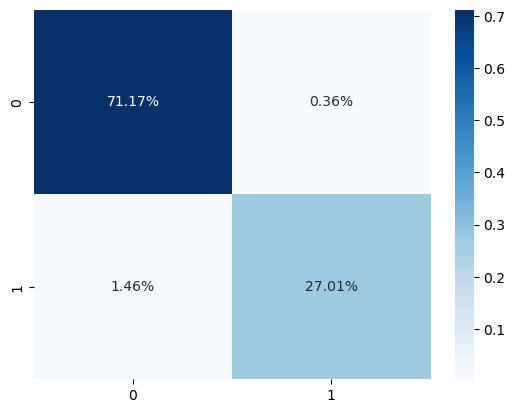

Accuracy is:  0.9817518248175182


In [16]:
#Creating heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

Feature: 0, Score: 0.01777
Feature: 1, Score: 0.21694
Feature: 2, Score: 0.23432
Feature: 3, Score: 0.12039
Feature: 4, Score: 0.06879
Feature: 5, Score: 0.05586
Feature: 6, Score: 0.14528
Feature: 7, Score: 0.07331
Feature: 8, Score: 0.06734


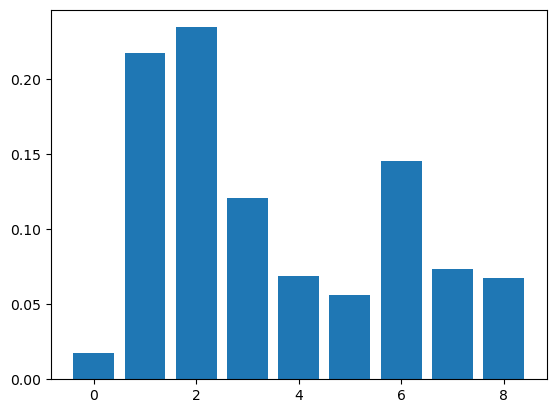

In [17]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1368, n_features=9, n_informative=6, random_state=1)

# define the model
model = RandomForestClassifier()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

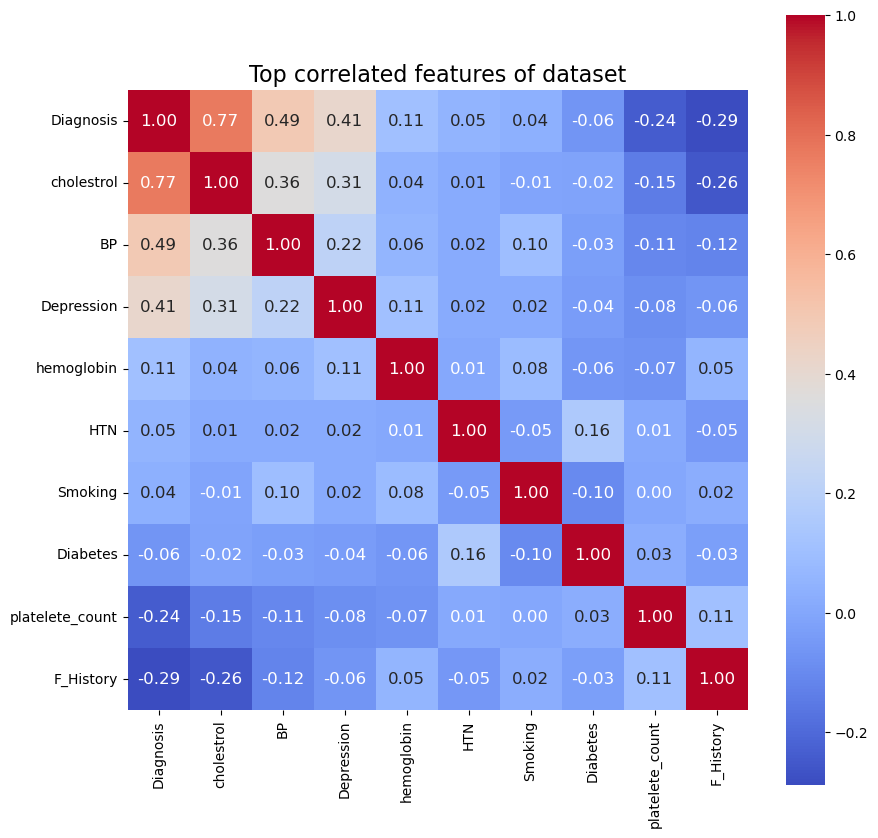

In [18]:
#Creating coorelation heatmap
top = 15
corr = data.corr()
top15 = corr.nlargest(top, 'Diagnosis')['Diagnosis'].index
corr_top15 = data[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

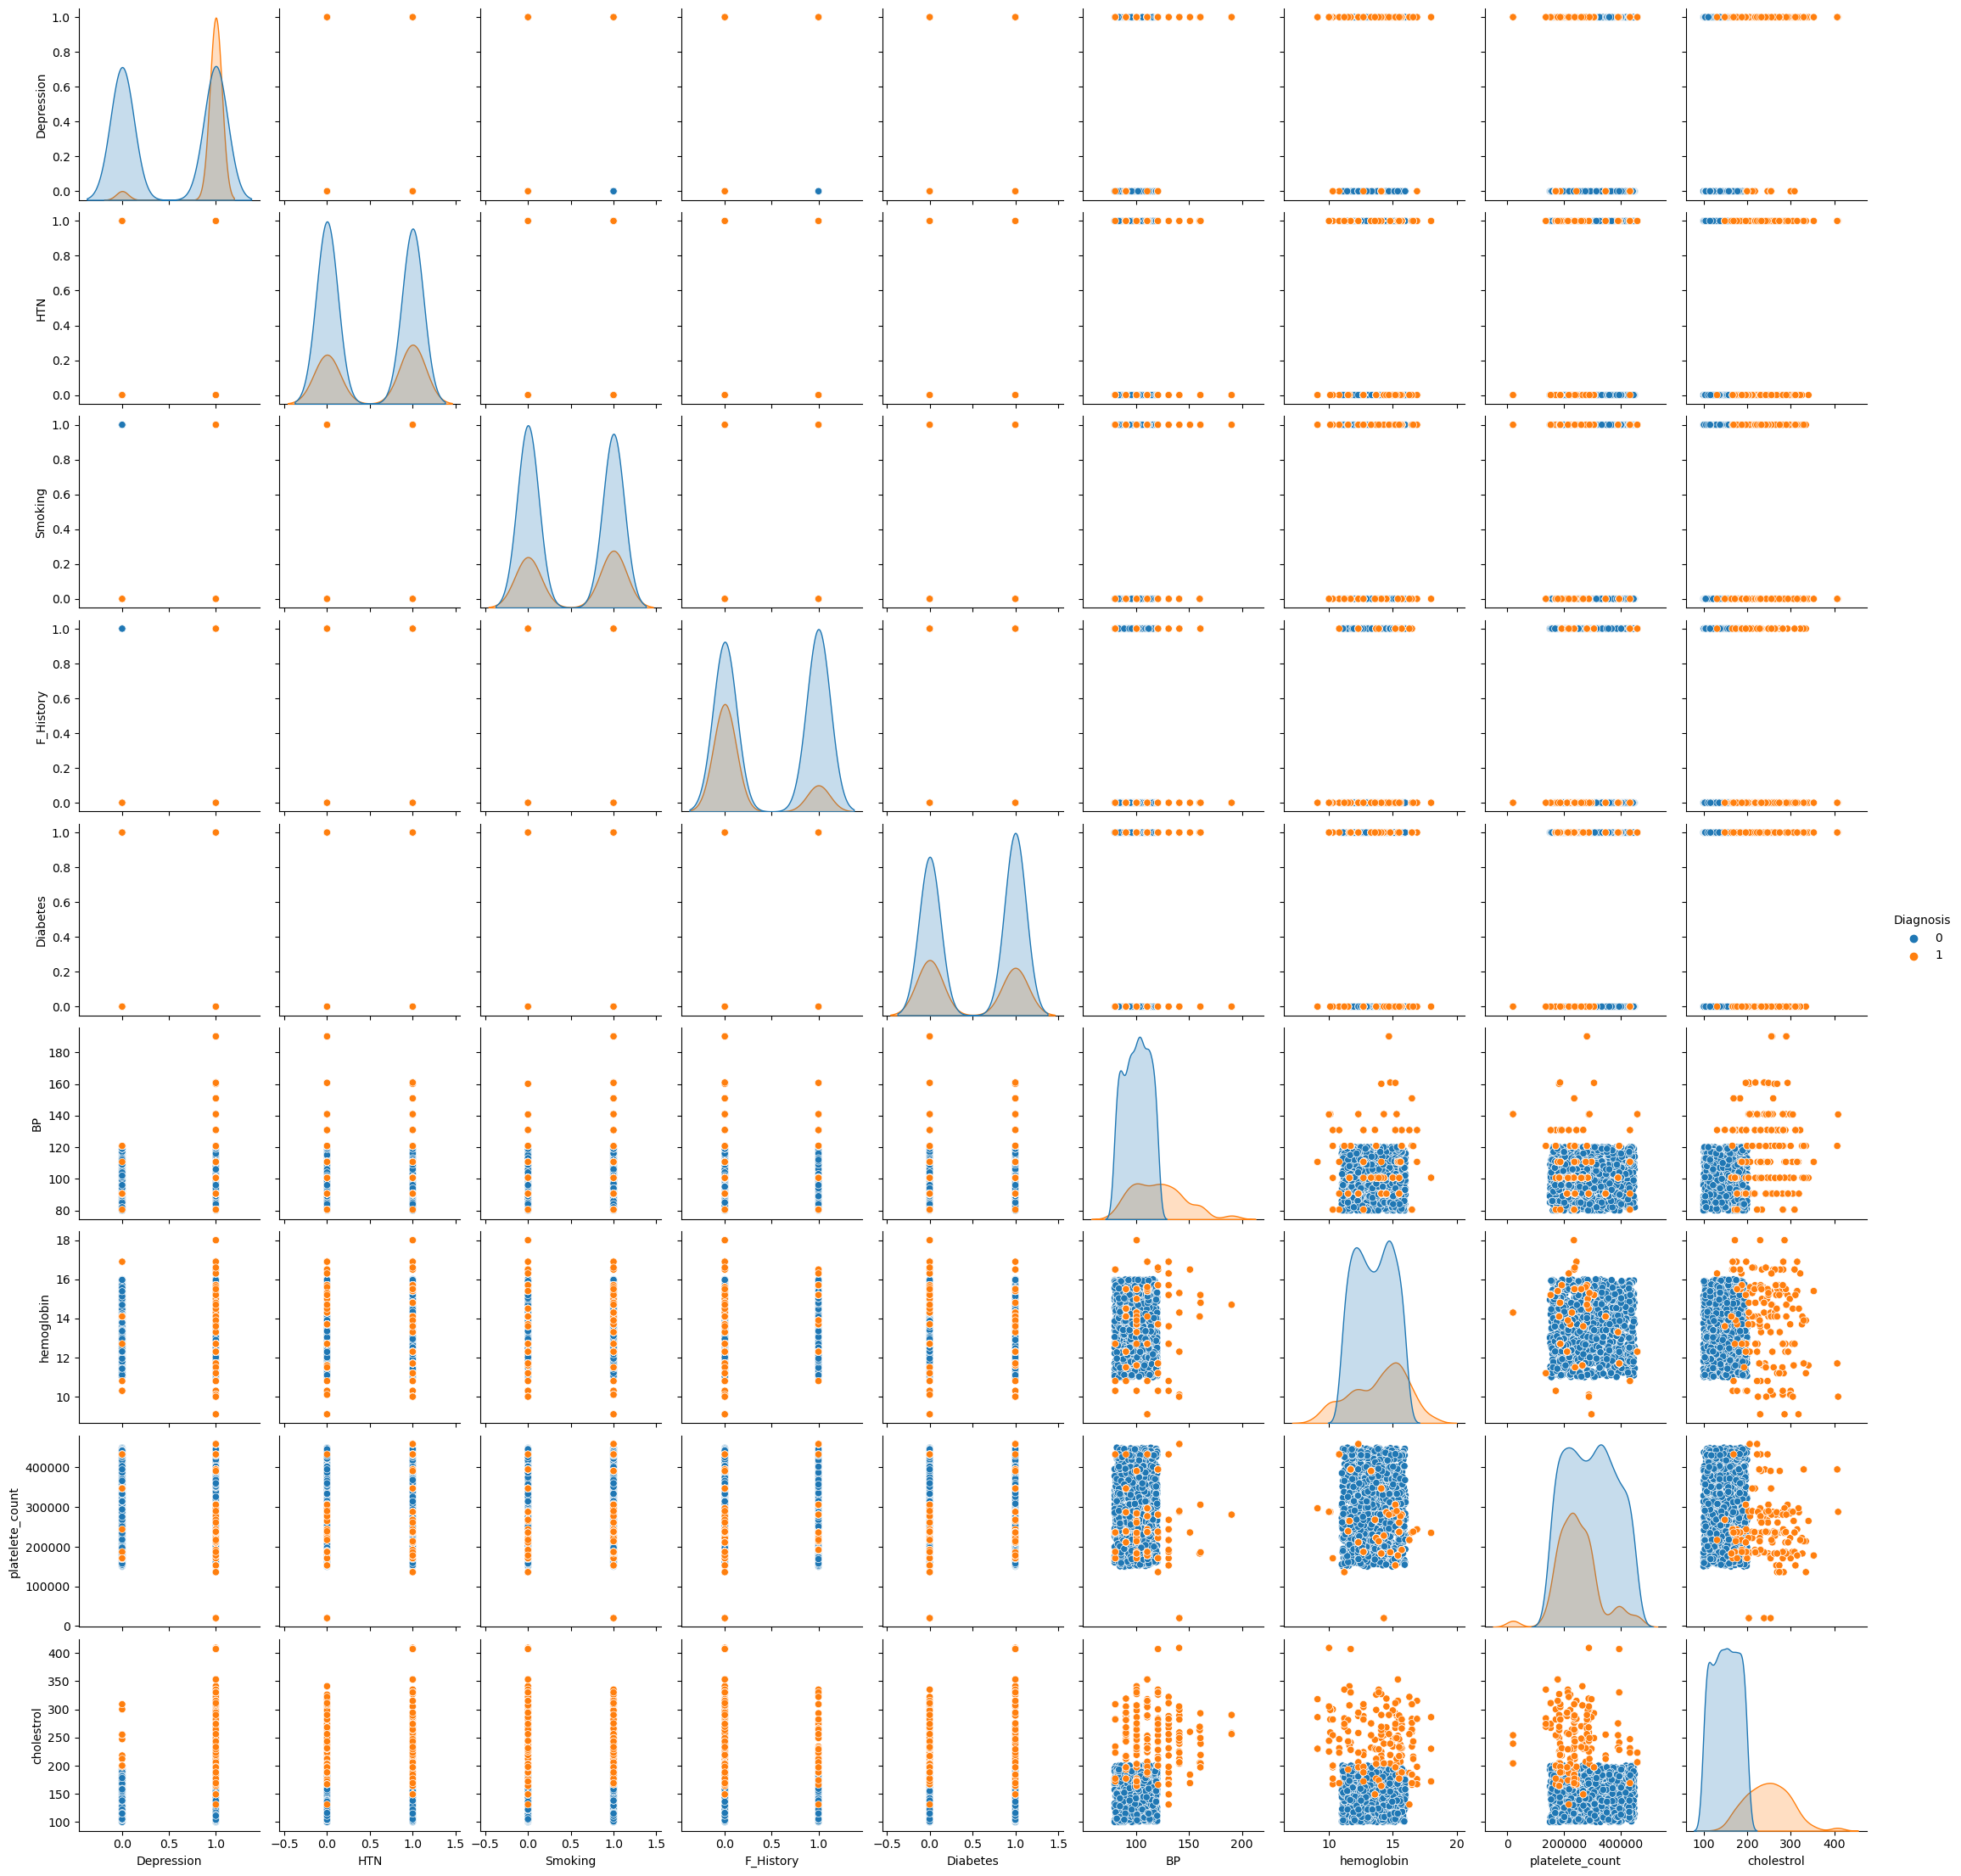

In [19]:
sns.pairplot(data, diag_kind = "kde", hue= "Diagnosis")
plt.show()

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


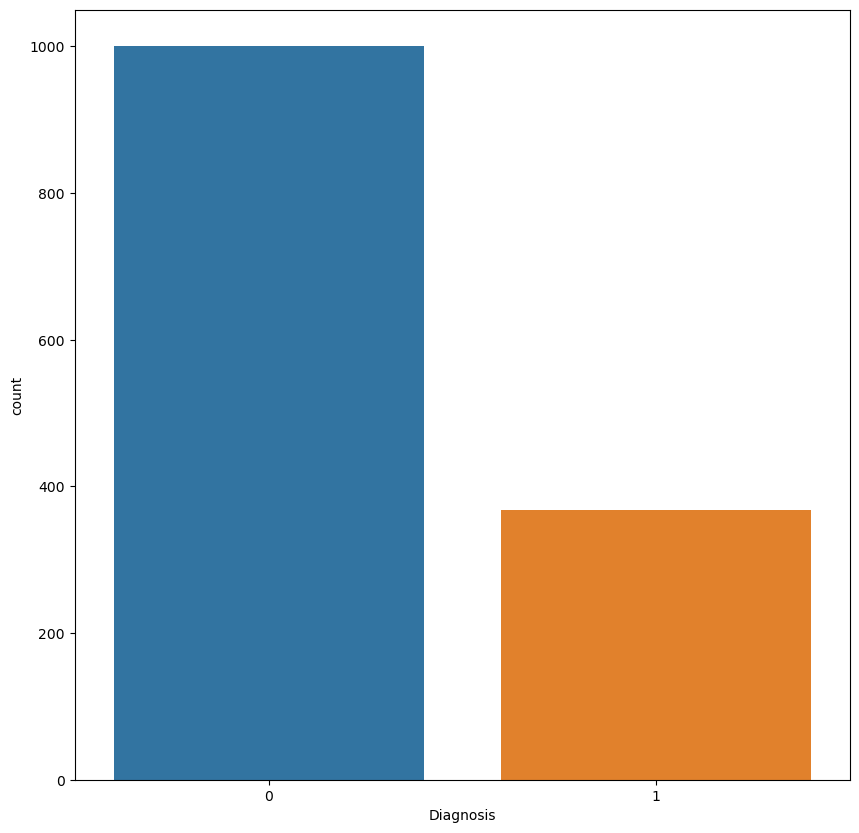

In [20]:
plt.figure(figsize = (10,10))
sns.countplot(data["Diagnosis"])
plt.show()

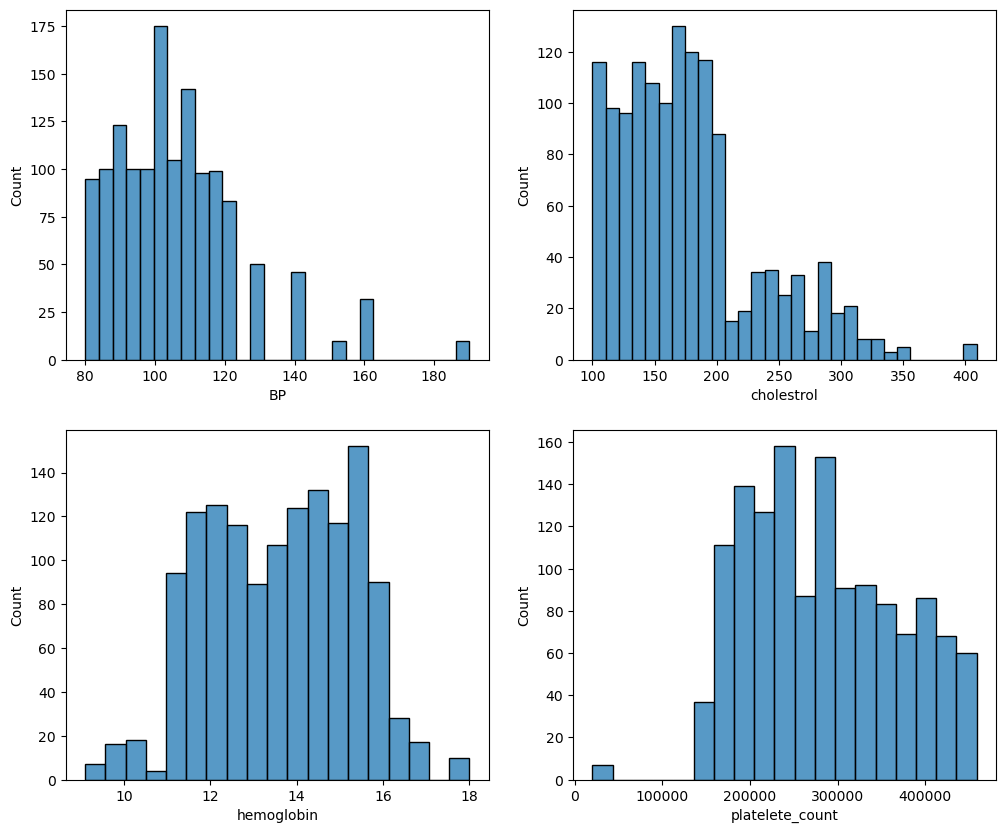

In [21]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 2)
sns.histplot(data["BP"], ax = axes[0,0])
sns.histplot(data["cholestrol"], ax = axes[0,1])
sns.histplot(data["hemoglobin"], ax = axes[1,0])
sns.histplot(data["platelete_count"], ax = axes[1,1])
plt.show()

In [22]:
import pickle

In [23]:
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()